In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install pandas
!pip install matplotlib
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=6b7b09b63180194305259c86dd845c611543278b2a369011e5ff10465b4bb8ce
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexe

In [ ]:
import pandas as pd
import os
import re
import string
import numpy as np

In [ ]:
df = pd.read_excel('/content/hasilFIFA2_NB.xlsx')
df.head(10)

,Hasil,Sentiments,klasifikasi_bayes
0,potential sanctions against the may also be de...,Negatif,Negatif
1,media sosial profesional warganet professional...,Negatif,Negatif
2,skenarionya gini argentina gagal lolos indones...,Positif,Negatif
3,disayangkan batal batal indonesia main tunggu ...,Positif,Negatif
4,batal tuan rumah indonesia hikmah sanksi israe...,Positif,Negatif
5,terima tim israel main terima iya mrk main ses...,Positif,Positif
6,indonesia batal negara pengganti more,Negatif,Negatif
7,kanjuruhan kejadiannya isu batal isu muncul la...,Positif,Positif
8,batal indonesia banned liga stop resmi beribu ...,Negatif,Negatif
9,manusia tolol bilang batal kanjuruhan disalahi...,Positif,Negatif


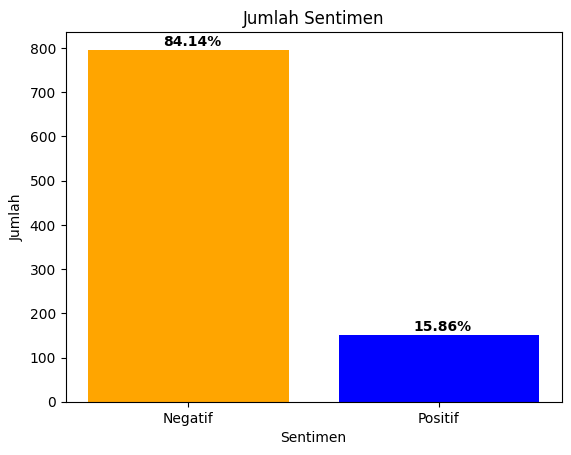

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# menghitung jumlah sentimen
sentiment_count = pd.value_counts(df['klasifikasi_bayes'])

# menghitung persentase sentimen
sentiment_percentage = sentiment_count / len(df) * 100

# membuat bar plot
fig, ax = plt.subplots()
ax.bar(sentiment_count.index, sentiment_count.values, color=['orange', 'blue'])

# menampilkan persentase pada plot
for i, v in enumerate(sentiment_percentage):
    ax.text(i-0.1, sentiment_count.values[i] + 10, f"{v:.2f}%", fontweight='bold')

# menambahkan judul dan label pada plot
ax.set_title('Jumlah Sentimen')
ax.set_xlabel('Sentimen')
ax.set_ylabel('Jumlah')

# menampilkan plot
plt.show()

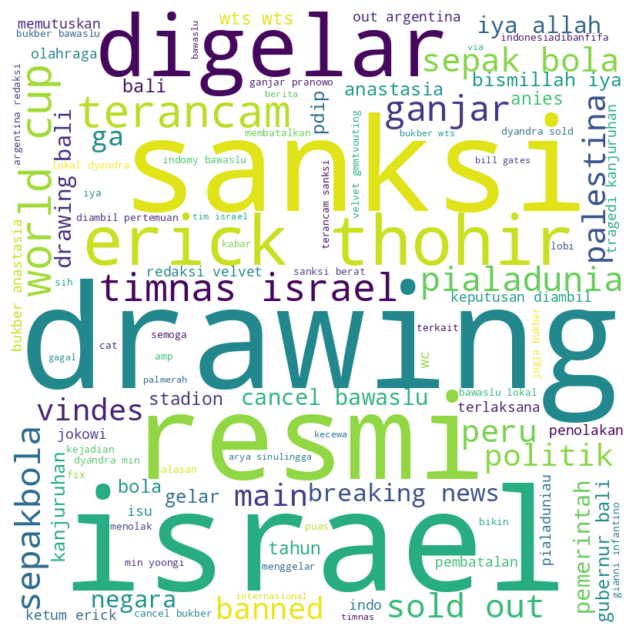

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections
import re

"""# Load data from CSV file
df = pd.read_csv('/content/FIFAHasil.csv', encoding='utf-8')
"""
# Concatenate all text data into one string
text = ' '.join(df['Hasil'])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3,
                      contour_color='steelblue', stopwords={"indonesia", "tuan", "rumah", "batal"})
wordcloud.generate(text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Teks contoh
teks = ' '.join(df['Hasil'])

# Mengubah teks menjadi huruf kecil
teks = teks.lower()

# Menghapus tanda baca
teks = ''.join(c for c in teks if c.isalnum() or c.isspace())

# Memisahkan kata-kata dalam teks
kata = teks.split()

# Menghitung jumlah kata
jumlah_kata = len(kata)

# Menampilkan jumlah kata
print("Jumlah kata dalam teks:", jumlah_kata)


Jumlah kata dalam teks: 12751


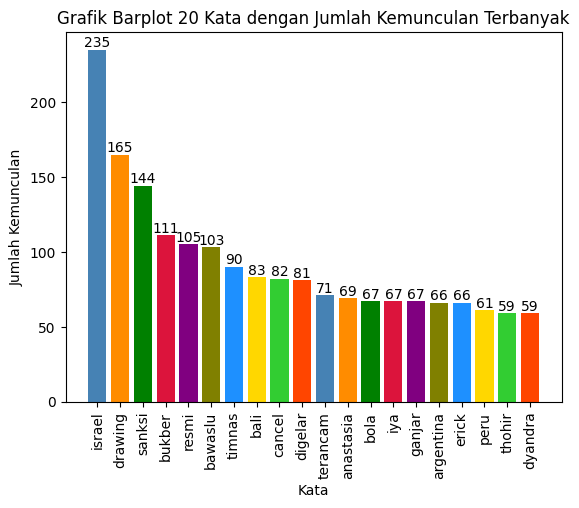

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Teks contoh
teks = ' '.join(df['Hasil'])

# Stopwords kustomisasi
custom_stopwords = ["indonesia", "tuan", "rumah", "batal"]

# Mengambil stopwords bawaan dan stopwords kustomisasi
stopwords = custom_stopwords

# Menghapus stopwords dari teks
teks = ' '.join([word for word in teks.split() if word.lower() not in stopwords])

# Menghitung frekuensi kemunculan kata
counter = Counter(teks.split())

# Mengambil 10 kata dengan jumlah kemunculan terbanyak
top_20 = counter.most_common(20)

# Menyiapkan data untuk grafik barplot
labels, counts = zip(*top_20)

# Membuat warna berbeda untuk setiap batang dalam grafik barplot
colors = ['steelblue', 'darkorange', 'green', 'crimson', 'purple', 'olive', 'dodgerblue', 'gold', 'limegreen', 'orangered']

# Menampilkan grafik barplot
plt.bar(labels, counts, color=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Kata')
plt.ylabel('Jumlah Kemunculan')
plt.title('Grafik Barplot 20 Kata dengan Jumlah Kemunculan Terbanyak')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


# Wordcloud Tweet Positif

In [ ]:
tweet_positif=df[df['klasifikasi_bayes'] == 'Positif']
tweet_positif.head(10)

,Hasil,Sentiments,klasifikasi_bayes
5,terima tim israel main terima iya mrk main ses...,Positif,Positif
7,kanjuruhan kejadiannya isu batal isu muncul la...,Positif,Positif
13,kukut wae mas wali kesempatan main pupus selam...,Positif,Positif
23,sedih asli iya fix batal indonesia gara gara p...,Positif,Positif
33,hmm olahraga dikaitin politik batal diadain ru...,Positif,Positif
35,dana amerika full support anies capres batal a...,Negatif,Positif
42,tertawa seru plidun batal indo banned liga ber...,Positif,Positif
54,sarah anastasia manggarai batal vindes bukber ...,Negatif,Positif
55,bukber batal vindes manggarai sarah to bawaslu...,Negatif,Positif
57,berurusan anies pendukungnya brutal batal canc...,Negatif,Positif


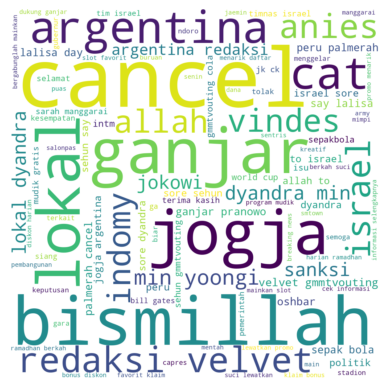

In [ ]:
# filter data dengan sentimen positif
data_positif = tweet_positif[tweet_positif['klasifikasi_bayes'] == 'Positif']

# gabungkan semua tweet menjadi satu string
all_tweets_positif = " ".join(tweet for tweet in data_positif['Hasil'])

# generate wordcloud
data_positif = WordCloud(width=1200, height=1200, background_color='white', max_words=100, contour_width=3, contour_color='steelblue',
                                  stopwords={"indonesia", "tuan", "rumah", "batal", "wts", "drawing", "resmi", "digelar", "bukber",
                                             "anastasia", "sold", "out", "bawaslu", "iya"})
data_positif.generate(all_tweets_positif)

# tampilkan wordcloud
plt.imshow(data_positif, interpolation='bilinear')
plt.axis("off")
plt.show()

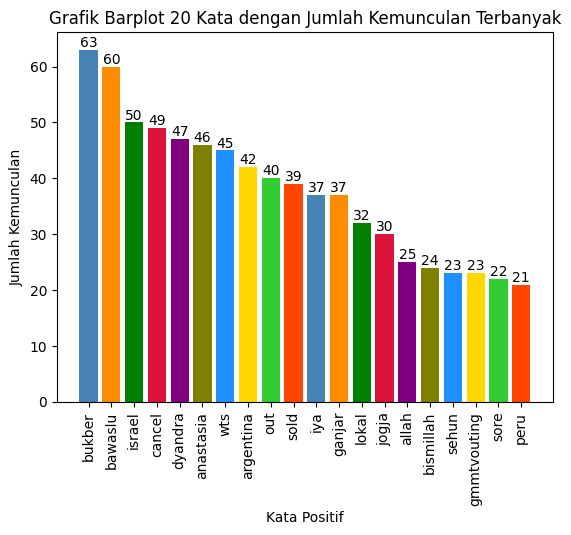

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# filter data dengan sentimen positif
data_positif = tweet_positif[tweet_positif['klasifikasi_bayes'] == 'Positif']

# Teks contoh
teks = " ".join(tweet for tweet in data_positif['Hasil'])

# Stopwords kustomisasi
custom_stopwords = ["indonesia", "tuan", "rumah", "batal"]

# Mengambil stopwords bawaan dan stopwords kustomisasi
stopwords = custom_stopwords

# Menghapus stopwords dari teks
teks = ' '.join([word for word in teks.split() if word.lower() not in stopwords])

# Menghitung frekuensi kemunculan kata
counter = Counter(teks.split())

# Mengambil 10 kata dengan jumlah kemunculan terbanyak
top_20 = counter.most_common(20)

# Menyiapkan data untuk grafik barplot
labels, counts = zip(*top_20)

# Membuat warna berbeda untuk setiap batang dalam grafik barplot
colors = ['steelblue', 'darkorange', 'green', 'crimson', 'purple', 'olive', 'dodgerblue', 'gold', 'limegreen', 'orangered']

# Menampilkan grafik barplot
plt.bar(labels, counts, color=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Kata Positif')
plt.ylabel('Jumlah Kemunculan')
plt.title('Grafik Barplot 20 Kata dengan Jumlah Kemunculan Terbanyak')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


# Worcloud Tweet Negatif

In [ ]:
tweet_negatif=df[df['klasifikasi_bayes'] == 'Negatif']
tweet_negatif.head(10)

,Hasil,Sentiments,klasifikasi_bayes
0,potential sanctions against the may also be de...,Negatif,Negatif
1,media sosial profesional warganet professional...,Negatif,Negatif
2,skenarionya gini argentina gagal lolos indones...,Positif,Negatif
3,disayangkan batal batal indonesia main tunggu ...,Positif,Negatif
4,batal tuan rumah indonesia hikmah sanksi israe...,Positif,Negatif
6,indonesia batal negara pengganti more,Negatif,Negatif
8,batal indonesia banned liga stop resmi beribu ...,Negatif,Negatif
9,manusia tolol bilang batal kanjuruhan disalahi...,Positif,Negatif
10,cokkkk asu cok batal tuan rumah cok main iya i...,Negatif,Negatif
11,indonesia batal tuan rumah kondisi ideal,Positif,Negatif


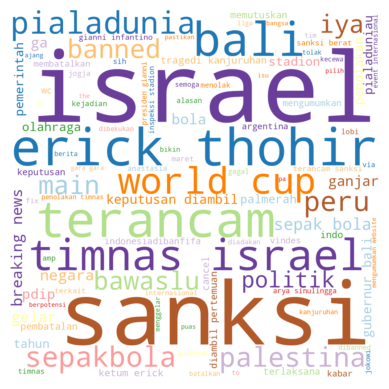

In [ ]:
# filter data dengan sentimen negatif
data_negatif = tweet_negatif[tweet_negatif['klasifikasi_bayes'] == 'Negatif']

# gabungkan semua tweet menjadi satu string
all_tweets_negatif = " ".join(tweet for tweet in data_negatif['Hasil'])

# generate wordcloud
data_negatif = WordCloud(width=1200, height=1200, background_color='white', max_words=100, contour_width=3,
                         contour_color='steelblue', colormap='Paired',
                         stopwords={"indonesia", "tuan", "rumah", "batal", "wts", "drawing", "resmi", "digelar", "bukber"})
data_negatif.generate(all_tweets_negatif)

# tampilkan wordcloud
plt.imshow(data_negatif, interpolation='bilinear')
plt.axis("off")
plt.show()

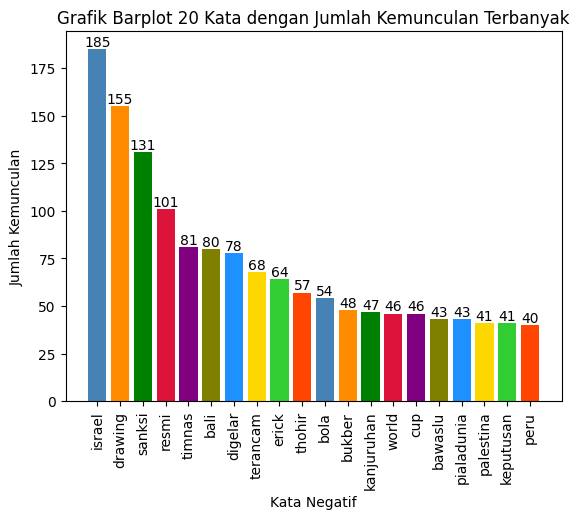

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# filter data dengan sentimen negatif
data_negatif = tweet_negatif[tweet_negatif['klasifikasi_bayes'] == 'Negatif']

# Teks contoh
teks = " ".join(tweet for tweet in data_negatif['Hasil'])

# Stopwords kustomisasi
custom_stopwords = ["indonesia", "tuan", "rumah", "batal"]

# Mengambil stopwords bawaan dan stopwords kustomisasi
stopwords = custom_stopwords

# Menghapus stopwords dari teks
teks = ' '.join([word for word in teks.split() if word.lower() not in stopwords])

# Menghitung frekuensi kemunculan kata
counter = Counter(teks.split())

# Mengambil 10 kata dengan jumlah kemunculan terbanyak
top_20 = counter.most_common(20)

# Menyiapkan data untuk grafik barplot
labels, counts = zip(*top_20)

# Membuat warna berbeda untuk setiap batang dalam grafik barplot
colors = ['steelblue', 'darkorange', 'green', 'crimson', 'purple', 'olive', 'dodgerblue', 'gold', 'limegreen', 'orangered']

# Menampilkan grafik barplot
plt.bar(labels, counts, color=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Kata Negatif')
plt.ylabel('Jumlah Kemunculan')
plt.title('Grafik Barplot 20 Kata dengan Jumlah Kemunculan Terbanyak')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


# Confusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(df['Sentiments'], df['klasifikasi_bayes']))

              precision    recall  f1-score   support

     Negatif       0.86      0.95      0.90       718
     Positif       0.76      0.50      0.60       228

    accuracy                           0.84       946
   macro avg       0.81      0.72      0.75       946
weighted avg       0.83      0.84      0.83       946



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

"""# load dataset
data = pd.read_excel("/content/pembobotanU20.xlsx")"""

# pisahkan kolom label dari dataset
true_labels = df["klasifikasi_bayes"]
predicted_labels = df["Sentiments"]

# hitung confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# tampilkan hasil
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[682 114]
 [ 36 114]]


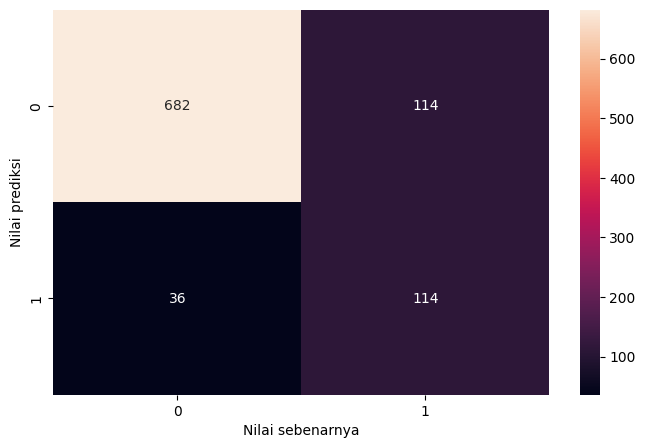

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Nilai sebenarnya")
plt.ylabel("Nilai prediksi")
plt.show()